In [1]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit
%matplotlib inline

# Up-Sampling

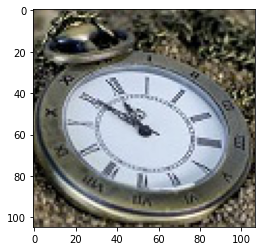

In [5]:
im = Image.open("images/clock.jpg")
pylab.imshow(im)
pylab.show()

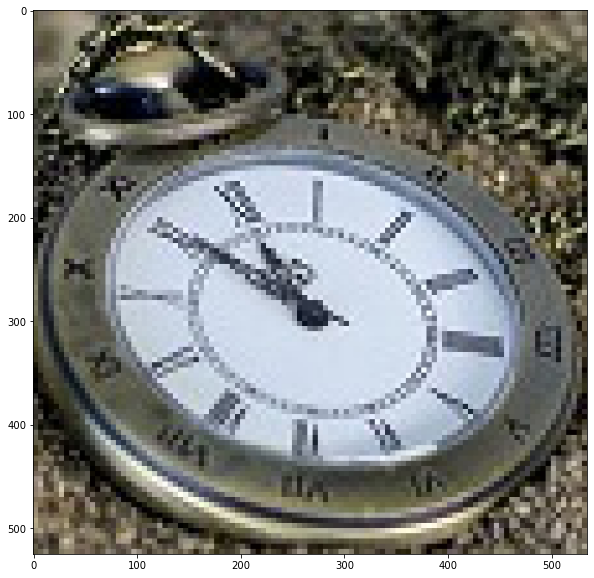

In [6]:
im1 = im.resize((im.width*5, im.height*5), Image.NEAREST)
pylab.figure(figsize=(10, 10))
pylab.imshow(im1)
pylab.show()

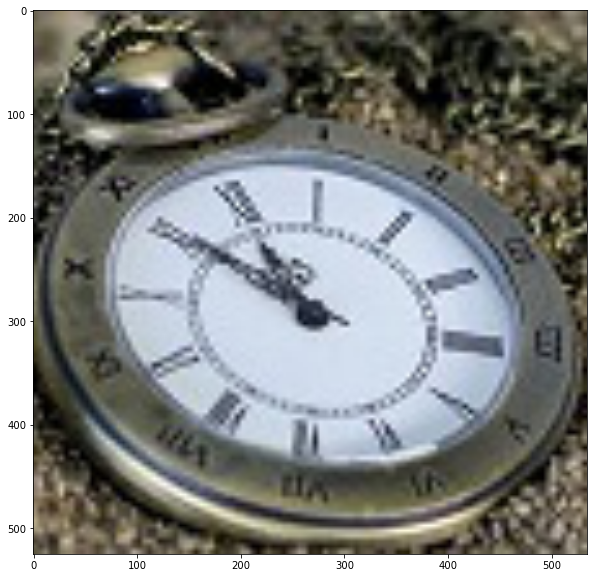

In [7]:
im1 = im.resize((im.width*5, im.height*5), Image.BILINEAR)
pylab.figure(figsize=(10, 10))
pylab.imshow(im1)
pylab.show()

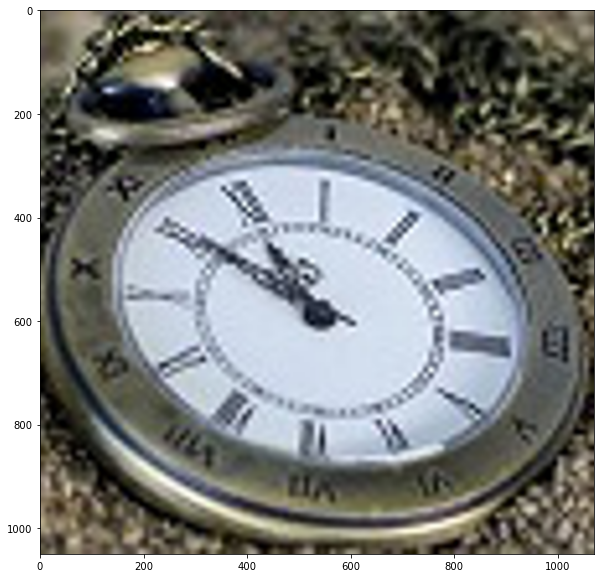

In [8]:
im1 = im.resize((im.width*10, im.height*10), Image.BICUBIC)
pylab.figure(figsize=(10, 10))
pylab.imshow(im1)
pylab.show()

In [9]:
im = Image.open("images/tajmahal.jpg")
im.show()

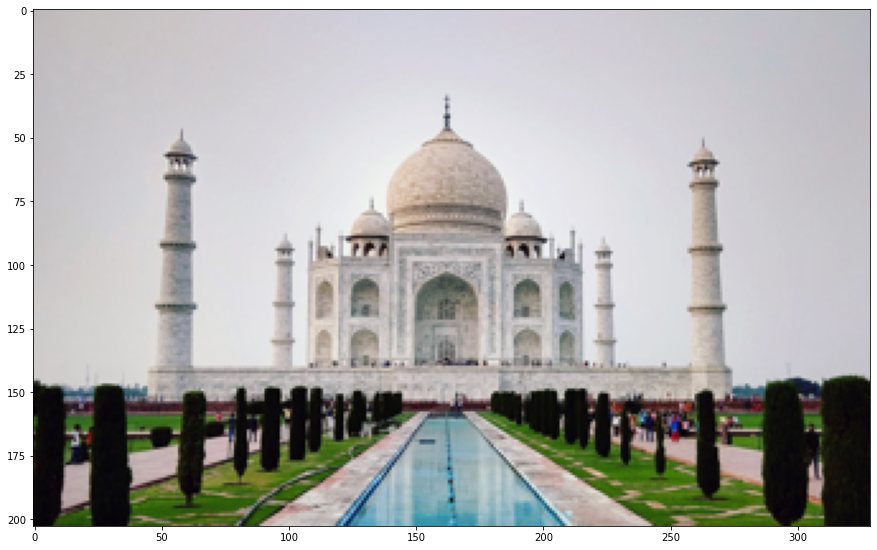

In [10]:
im = im.resize((im.width//5, im.height//5))
pylab.figure(figsize=(15, 10))
pylab.imshow(im)
pylab.show()

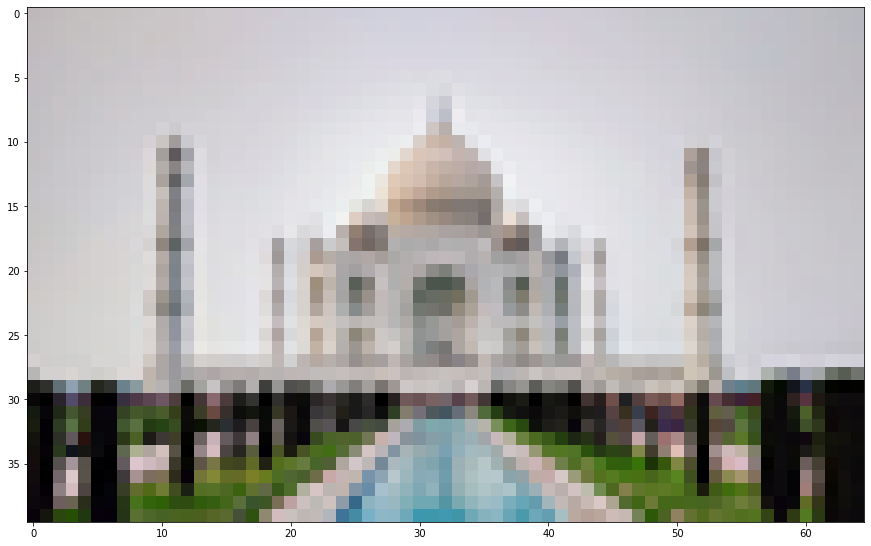

In [11]:
im = im.resize((im.width//5, im.height//5), Image.ANTIALIAS)
pylab.figure(figsize=(15, 10))
pylab.imshow(im)
pylab.show()

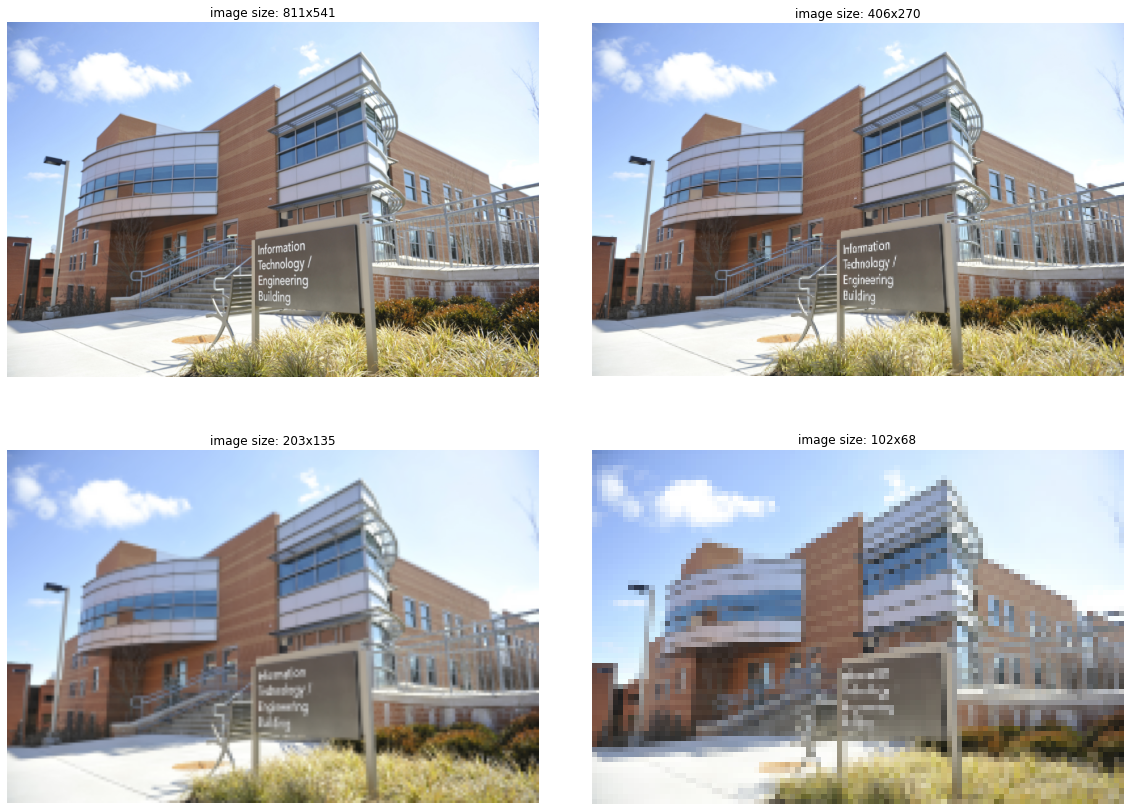

In [12]:
im = imread('images/umbc.png')
im1 = im.copy()
pylab.figure(figsize=(20, 15))
for i in range(4):
    pylab.subplot(2, 2, i+1)
    pylab.imshow(im1, cmap="gray")
    pylab.axis('off')
    pylab.title('image size: ' + str(im1. shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=False)
    
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()


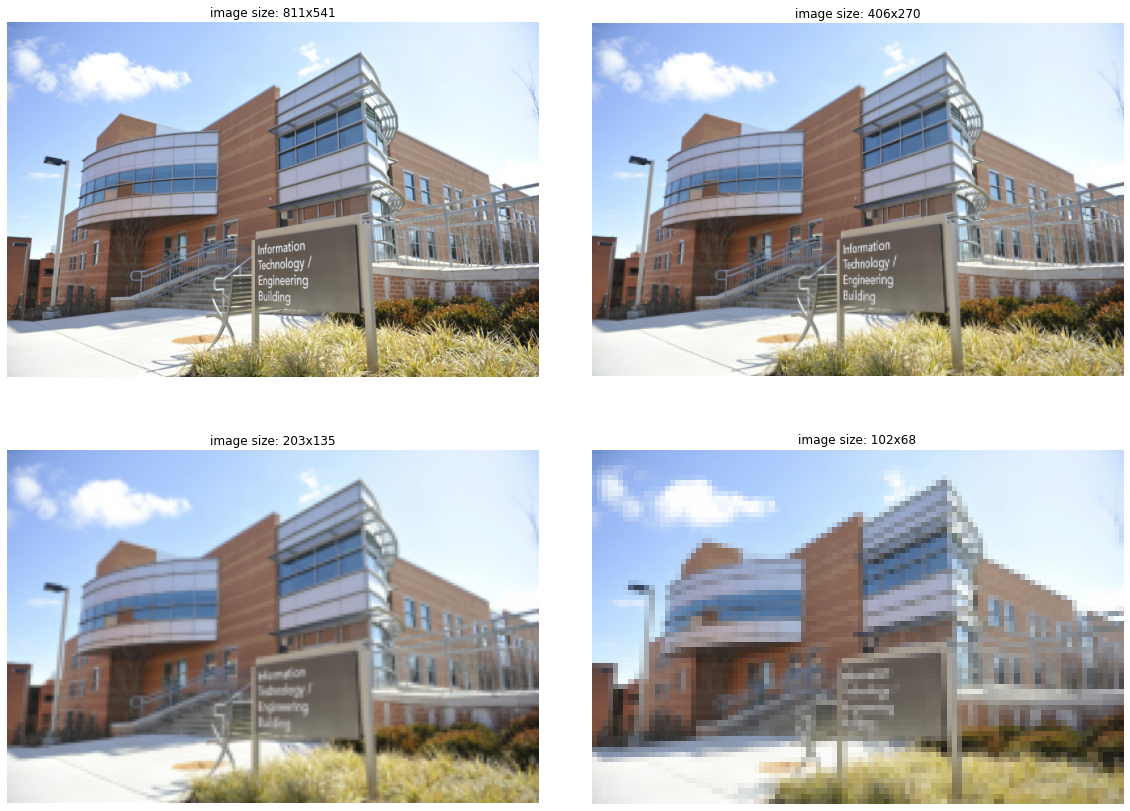

In [13]:
im = imread('images/umbc.png')
im1 = im.copy()
pylab.figure(figsize=(20, 15))
for i in range(4):
    pylab.subplot(2, 2, i+1)
    pylab.imshow(im1, cmap="gray")
    pylab.axis('off')
    pylab.title('image size: ' + str(im1. shape[1]) + 'x' + str(im1.shape[0]))
    im1 = rescale(im1, scale = 0.5, multichannel=True, anti_aliasing=True)
    
pylab.subplots_adjust(wspace=0.1, hspace=0.1)
pylab.show()



In [14]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

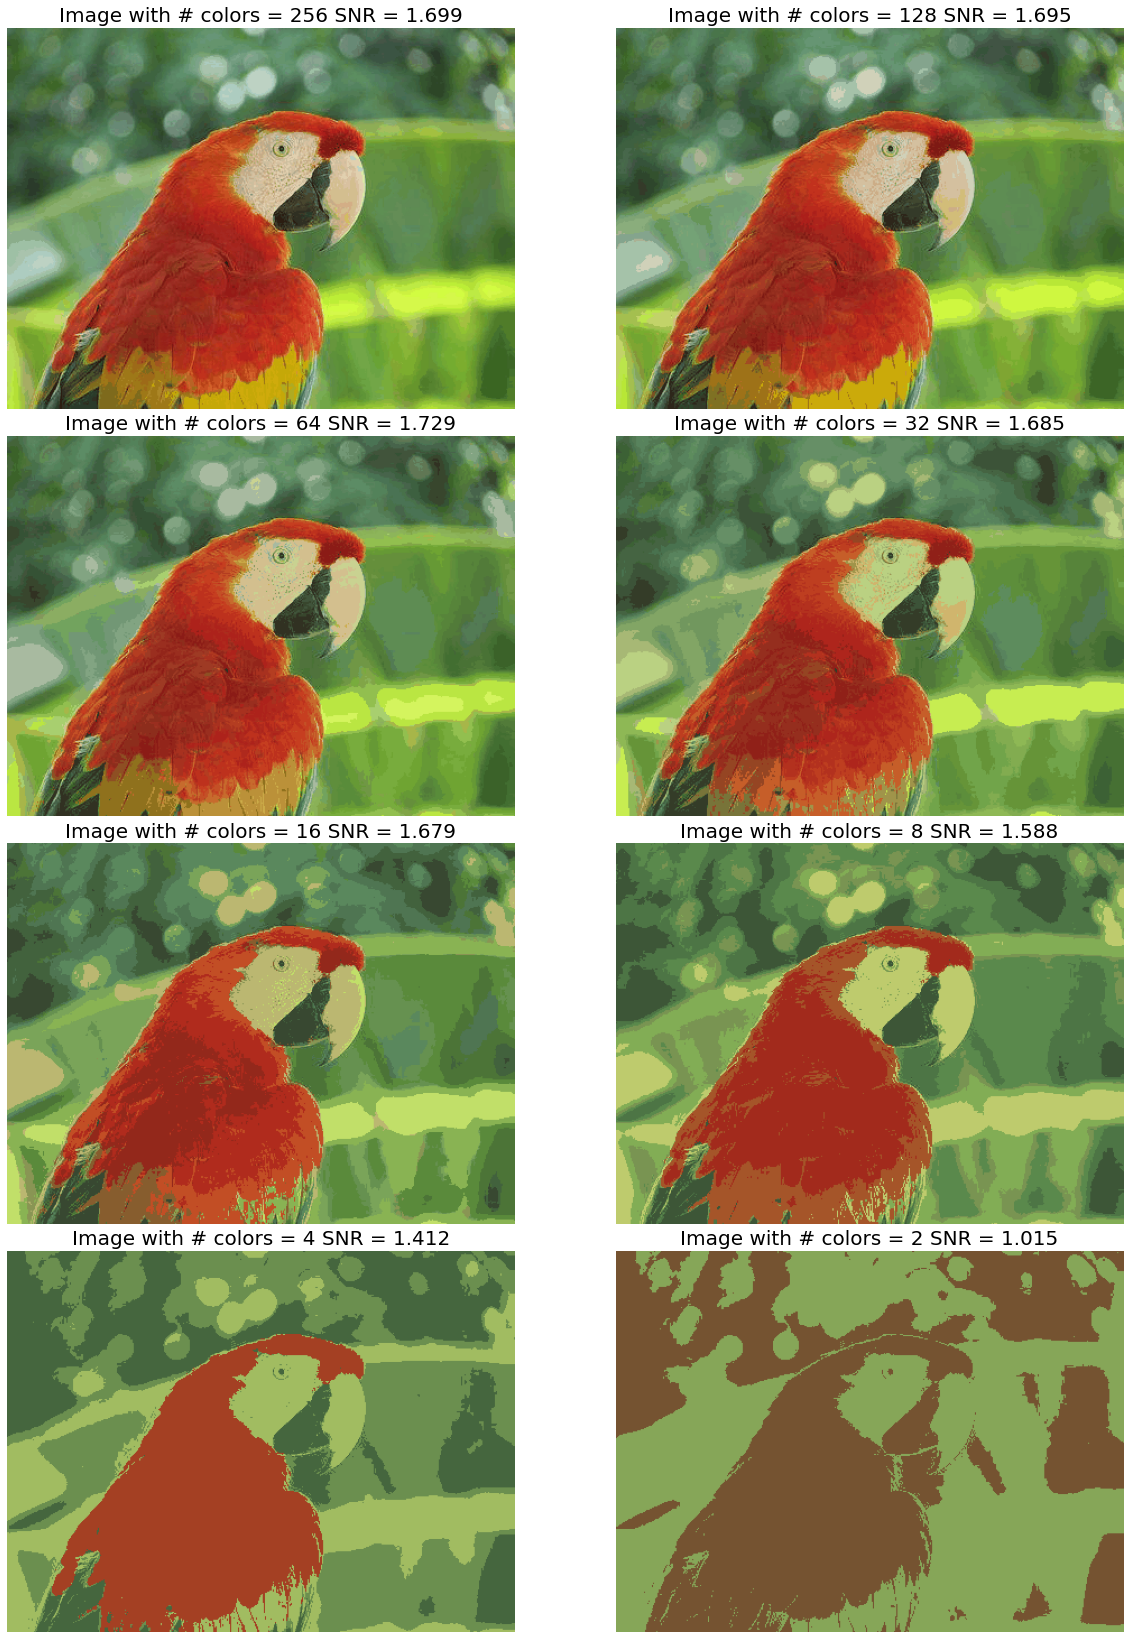

In [15]:
im = Image.open("images/parrot.jpg")
pylab.figure(figsize=(20, 30))
num_colors_list = [1 << n for n in range(8, 0, -1)]
snr_list = []
i = 1
for num_colors in num_colors_list:
    im1 = im.convert('P', palette=Image.ADAPTIVE, colors=num_colors)
    pylab.subplot(4, 2, i)
    pylab.imshow(im1)
    pylab.axis('off')
    snr_list.append(signaltonoise(im1, axis=None))
    pylab.title('Image with # colors = ' + str(num_colors) + ' SNR = ' + str(np.round(snr_list[i-1], 3)), size=20)
    i += 1
pylab.subplots_adjust(wspace=0.2, hspace=0)
pylab.show()

<ipython-input-16-18d632ae1a12>:5: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  pylab.xscale('log', basex=2)


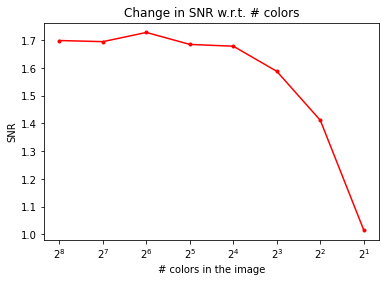

In [16]:
pylab.plot(num_colors_list, snr_list, 'r.-')
pylab.xlabel("# colors in the image")
pylab.ylabel('SNR')
pylab.title('Change in SNR w.r.t. # colors')
pylab.xscale('log', basex=2)
pylab.gca().invert_xaxis()
pylab.show()

SNR for the original image = 2.032390538354219
SNR for the image obtained after reconstruction = 2.032390538354219


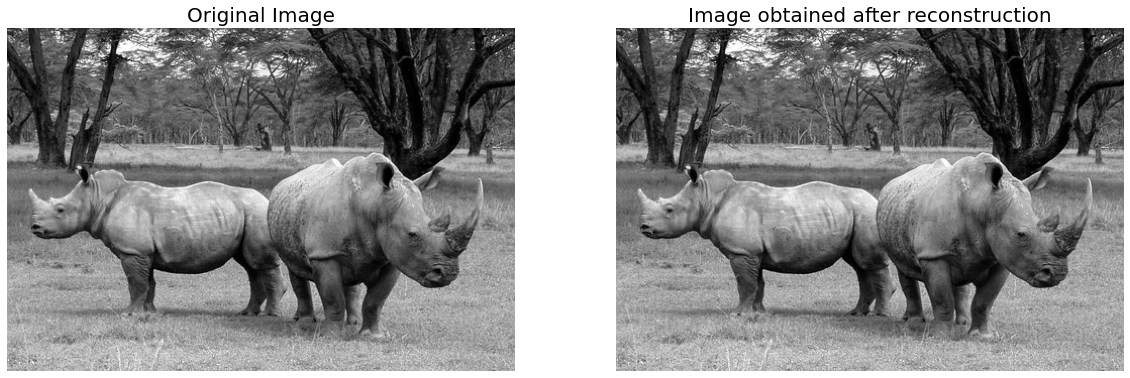

In [17]:
im = np.array(Image.open("images/rhino.jpg").convert('L'))
snr = signaltonoise(im, axis=None)
print("SNR for the original image = "+ str(snr))
freq = fp.fft2(im)
im1 = fp.ifft2(freq).real
snr = signaltonoise(im1, axis=None)
print('SNR for the image obtained after reconstruction = ' + str(snr))
assert(np.allclose(im, im1))
pylab.figure(figsize=(20, 10))
pylab.subplot(121)
pylab.imshow(im, cmap='gray')
pylab.axis('off')
pylab.title('Original Image', size=20)
pylab.subplot(122)
pylab.imshow(im1, cmap='gray')
pylab.axis('off')
pylab.title('Image obtained after reconstruction', size=20)
pylab.show()

<ipython-input-18-ec185ad197f1>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow((20*np.log10(0.1+freq2)).astype(int))


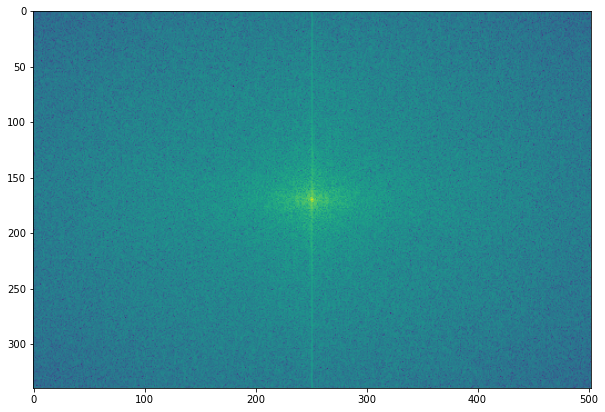

In [18]:
freq2 = fp.fftshift(freq)
pylab.figure(figsize=(10, 10))
pylab.imshow((20*np.log10(0.1+freq2)).astype(int))
pylab.show()

In [13]:
import numpy.fft as fp

<ipython-input-2-e8613191dc7f>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  im1 = rgb2gray(imread("images/house.png"))


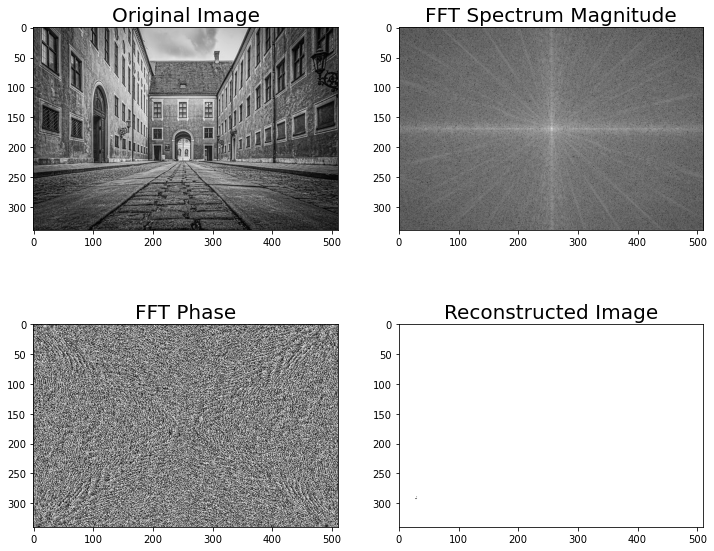

In [2]:
im1 = rgb2gray(imread("images/house.png"))
pylab.figure(figsize=(12, 10))
freq1 = fp.fft2(im1)
im1_ = fp.fft2(freq1).real
pylab.subplot(2, 2, 1)
pylab.imshow(im1, cmap="gray")
pylab.title("Original Image", size=20)
pylab.subplot(2, 2, 2)
pylab.imshow(20*np.log10(0.01+np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=20)
pylab.subplot(2, 2, 3)
pylab.imshow(np.angle(fp.fftshift(freq1)), cmap='gray')
pylab.title("FFT Phase", size=20)
pylab.subplot(2, 2, 4)
pylab.imshow(np.clip(im1_, 0, 255), cmap='gray')
pylab.title("Reconstructed Image", size=20)
pylab.show()

<ipython-input-3-0e47f0a74562>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  im2 = rgb2gray(imread('images/house2.png'))


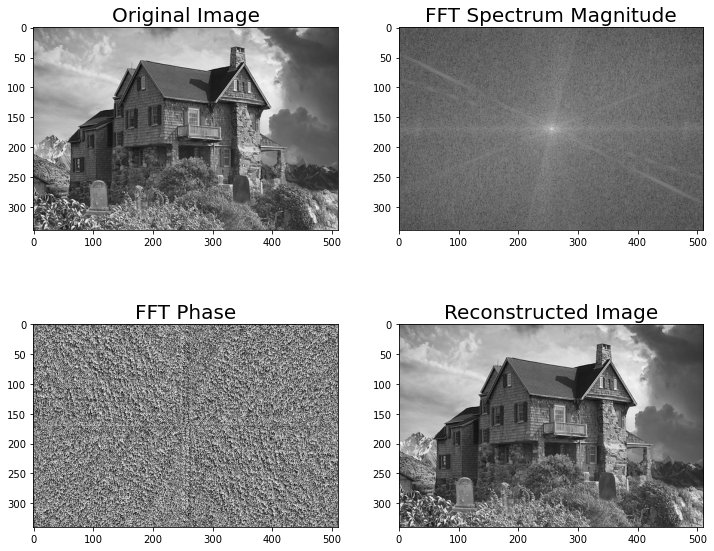

In [3]:
im2 = rgb2gray(imread('images/house2.png'))
pylab.figure(figsize=(12,10))
freq2 = fp.fft2(im2)
im2_ = fp.ifft2(freq2).real
pylab.subplot(2, 2, 1)
pylab.imshow(im2, cmap='gray')
pylab.title('Original Image', size=20)

pylab.subplot(2, 2, 2)
pylab.imshow(20*np.log10(0.01+np.abs(fp.fftshift(freq2))), cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=20)

pylab.subplot(2, 2, 3)
pylab.imshow(np.angle(fp.fftshift(freq2)), cmap='gray')
pylab.title('FFT Phase', size=20)

pylab.subplot(2, 2, 4)
pylab.imshow(np.clip(im2_, 0, 255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

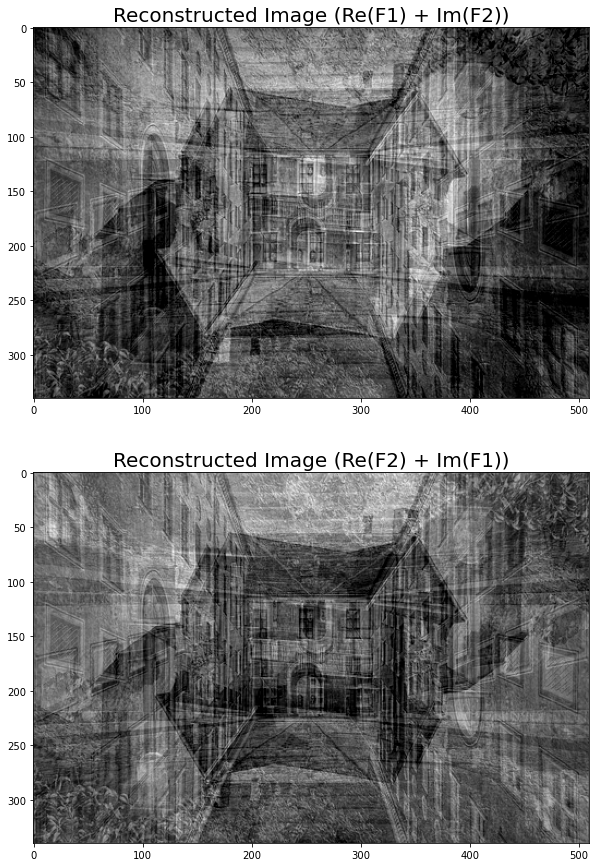

In [4]:
pylab.figure(figsize=(20, 15))
im1_ = fp.ifft2(np.vectorize(complex)(freq1.real, freq2.imag)).real
im2_ = fp.ifft2(np.vectorize(complex)(freq2.real, freq1.imag)).real
pylab.subplot(211)
pylab.imshow(np.clip(im1_, 0 ,255), cmap='gray')
pylab.title('Reconstructed Image (Re(F1) + Im(F2))', size=20)

pylab.subplot(212)
pylab.imshow(np.clip(im2_, 0, 255), cmap='gray')
pylab.title('Reconstructed Image (Re(F2) + Im(F1))', size=20)

pylab.show()